# A Visualization tutorial by Karthik Balasubramanian

# Altair Viz: A declarative statistics visualization library

## Motivation:
    
  
   There were so many visualization libraries in Python. **MatplotLib**,**Seaborn**,**Plotly**, **Bokeh**,   **Lightning**,**Pandas** are some of the options a user can have while trying to visualize. Every library has its   own ups and downs and the tool that we use to visualize largely depends on our need. All these APIs for visualization are inspired from the Principles of [Wilkinson's grammar of   graphics](http://vita.had.co.nz/papers/layered-grammar.pdf). Many users use different libraries these days to try to visualize their data in Jupyter Notebook. At times we go through problems which are still not addressed by the developers of individual visualisation libraries. So [Jake Vanderplas](https://github.com/jakevdp/altair/tree/master/doc) and [Brian Granger](https://github.com/ellisonbg) of **IPython project** decided to address generic API solution and that's how they started [Altair Viz](https://github.com/ellisonbg/altair) project. This is a completely new library but I believe that it has lot to offer for the IPython community.
   


## Visualization is pain in Python! Lets breakdown this problem

  Lets all accept this fact. I have used tableau, Excel, R. Visualization with these tools are really easy because they have easy drag and drop options. Whereas we have to understand lot of syntax and semantics to use a visualization library in python. I completely agree that we cannot custom visualize a very large dataset in Excel/ tableau as it eats up all the RAM and slows down our system. So libraries like these are the only scalable solution for visualizing large datasets. Lets first list down the drawbacks of the visualization libraries in Python.
  
  1. Sparse handling of statistical visualization
  2. User have to write lots of code even for incidental aspects of visualization.
  3. Its becoming really difficult for users to decide on which library to use. There is a lot of learning curve to go through as a new library is introduced into the community.
  4. Most basic things are horribly complicated (Even the developers of Altair Viz agree)
  
  
### Components of  Statistical Visualization
    
There are three components in Statistical Visualization:
  
1. The **data** (How and what part). Data is generally represented as tidy dataframes with rows being the samples and columns being features (Categorical or numerical/timeseries data)
2. This tidy data is mapped to **visual properties** like x axis, y axis, color and shape using groupby operation
3. **Groups** correspond to conditional probability distribution

### What is the Visualization Grammar to follow?

 It is very important to have a set of well-defined rules that devise a set of abstractions while visualizing data. It'll be very nice to express the Statistical Visualization with a small number of abstractions. These abstractions form a Visualization Grammar. These abstractions are defined so that a model can be reused again. We have different levels of abstractions. But not all the visualization library present today follow strictly.
 
 
[![Grammar.png](https://s6.postimg.org/8v35cu0dd/Grammar.png)](https://postimg.org/image/7ssyuahjx/)



  Developers of Altair Viz claim that most of the libraries follow all these rules. But they lack in two of the rules in the ruleset.
  
  1. **Transformation**:
      We beleive that transformation of data happens before visualization. But when we do Statistical visualization, it is really difficult to do the data transformation before the visualization is done. We really have to develop a data transformation pipeline into the visualization process itself.
      
  2. **Scaling**:
      Scaling is nothing but mapping the transformed tidy data values to visualization properties like shapes, colors and facets (plane or axis). This mapping is incomplete in the current libraries. This is where most of the libraries lack representations. Libraries like Matplotlibs can map quantitative columns with visual properties but they lack representation for categorical and timeseries data.
      
 


## Types of API

  There are two types of APIs generally. Declarative and Imperative APIs. 
 
### Comparison between Declarative and imperative API

   The following table compares both types of APIs
  
  [![Compare.png](https://s6.postimg.org/6grea1dgh/Compare.png)](https://postimg.org/image/3zfn2rtjx/)
  
### Why Declarative API is better?

  Lets assume that you are building a decision tree. At each node level you would like determine the attribute that best classifies the dataset. To identify the attribute you will have to undergo a statistical test like **information gain** on each attribute and decide the best. But this process is error prone. We humans do lots of mistakes while doing such calculations and its a horror story to debug a multilevel decision tree when something goes wrong in these calculations. You know that you are capable of doing these math. Do you want to prove it each and every time??
  
  Given a magic function which does this mundane statistical property math forever **correctly** as you pass the parameters, wont you prefer that over writing the function yourself?
  
  [![why_dec.png](https://s6.postimg.org/jyyambplt/why_dec.png)](https://postimg.org/image/o830ohsv1/)
  

## Mapping Visualization APIs according to its characteristics

  Now lets concentrate on the space of visualisation libraries. The below image compares declarative and imperative viz libraries with two other important characteristics. **Ease of use** and  **representational power**.
  
  
  [![map_viz.png](https://s6.postimg.org/5h13ebyap/map_viz.png)](https://postimg.org/image/h6532ap99/) 
  
## Introducting Altair Viz API

  You may be wondering why Altair Viz is not there in the Declarative API section of the previous image. Atleast I have been telling you so far that Altair viz is a statistical visualization library.
  
  But!
  
  Let me confess you a truth. Altair is not fully a vizualization library because it does not do any rendering of visulaizations.
  
[![Altair Flow.png](https://s6.postimg.org/tlnijwl0h/Altair_Flow.png)](https://postimg.org/image/tyewq33a5/)


  We all know [D3.js](https://d3js.org/) renders rich visualizations. But it is verbose. We need to write lots of code to render even a simple [bar chart](http://d3-generator.com/). [Vega](https://vega.github.io/vega/) is a visualization grammar.It is a declarative format for creating and sharing interactive visualization designs which is built on D3.It is again verbose. Simple implementation of bar chart in [Vega](http://vega.github.io/vega-editor/index.html?spec=bar). [Vega-lite](https://vega.github.io/vega-lite/) is a high-level visualization grammar. It provides a concise JSON syntax for supporting rapid generation of visualizations to support analysis. It is strictly for declarative statistical visualizations.Check how well it simplifies the visualization of bar chart [here](https://vega.github.io/vega-editor/?mode=vega-lite&spec=bar)
  
  Developers of Altair-Viz did not try to re-invent the wheel. They wanted to utilise this powerful visualisation grammar which abstracts all the complexity of visualisation. So they created a Python API which emits **type-checked JSON** which is sent down to Vega-lite which inturn is interpreted by Vega and visualised by D3. This integration is well appreciated by all other viz library developer community like Matplotlib and they are also planning to create an API like Altair Viz so that Vega/Vega-lite become the lingua-franca of data visualisation

## How Altair Viz makes your life easier?

  Before we start, we should install Altair viz.
     
  `conda install altair --channel conda-forge`
  
  To do statistical visualization, you should have 3 distinct components working together. Let's understand these components syntax seperately.
  
  * Data
  * Visual properties
  * Transformation/Grouping
  
#### Data

 The data that we generally visualize is a tidy dataframe. This can be your pandas dataframe.

In [1]:
import pandas as pd
data = pd.DataFrame({'a': list('AABCCDDEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
data

,a,b
0,A,2
1,A,7
2,B,4
3,C,1
4,C,2
5,D,6
6,D,8
7,E,4
8,E,7


#### Visual properties

  The visual properties of data are defined in the **Chart** object. Chart object has variety of functions which can be applied on a dataframe when passed. It can also directly take in a JSON object. Once you load the data into Chart object, you will define the visual properties. Consider it like a pipeline and follow the instructions one after another.
  
  1. Define the kind chart you want to draw
  2. Define visual properties like Axis and color
  3. Define grouping functions

In [2]:
from altair import Chart

chart = Chart(data)
chart

  You can see that the chart object has already visualized the data before even you define its visual properties. What you can infer from this chart is that, All the rows in the dataframe overlap over one another with a default mark type called **mark_point**. Now lets add Visual properties to it

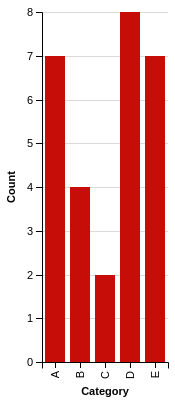

In [3]:
from altair import X,Y,Axis

chart.mark_bar(color='#c70d08').encode(
  X('a',axis=Axis(title='Category')),
  Y('b',axis=Axis(title='Count')),
)
chart


  That was so simple! The Chart object has many mark functions which lets you define the kind of chart to be drawn. Play around with the [options](https://altair-viz.github.io/API.html#altair.Chart.mark_area). You can define properties like color of the chart inside the 'mark_' function. **'#c70d08'** is an example color code. You can set your own color code from [here](http://www.color-hex.com/). Whatever you define inside the encode are called Channels and they are python classes themselves with init attributes. you can find more details about encoding channels [here](https://altair-viz.github.io/documentation/encoding.html).There are different types of encoding channels. Classes X,Y are called position encoding channels. In the last link, you have an example implementation of most of the channel types.
  
  You have to notice the links to **Vega editor** and **View Source** above. As you click those links you can understand how your chart definitions is transformed to type-checked Vega grammar which is sent to D3 to visualize.
  
  Another important functionality of Altair is automatic data type interpretation. We did not specify datatype of the Axis. Altair intelligently interprets the type of data and emits out the data according to its type. But you can always specify datatype. Altair classifies data into four types.
  
  Data type | Shorthand code | Description
------------ | ------------- | ------------
quantitative |	Q  |	a continuous real-valued quantity
ordinal |	O	| a discrete ordered quantity
nominal	| N	| a discrete unordered category
temporal |	T |	a time or date value

So you can also define the Chart this way.
  

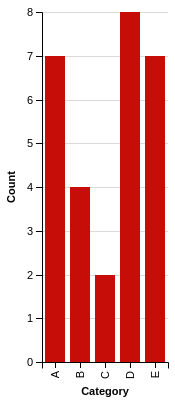

In [4]:
chart.mark_bar(color='#c70d08').encode(
  X('a:N',axis=Axis(title='Category')),
  Y('b:Q',axis=Axis(title='Count')),
)
chart

In [5]:
chart.to_dict(data=False)

{'config': {'mark': {'color': u'#c70d08'}},
 'encoding': {'x': {'axis': {'title': u'Category'},
   'field': u'a',
   'type': 'nominal'},
  'y': {'axis': {'title': u'Count'}, 'field': u'b', 'type': 'quantitative'}},
 'mark': 'bar'}

  The chart you deined can be converted to dictionary and its visual properties can be understood. Lets see a bit more fancy chart now. For simplicity I am going to use the datasets that are pre-defined in Altair. Datasets are in JSON format and they can be loaded directly. We can also use **load_dataset** function to get the dataframe version of the dataset.

In [6]:
# in-built data sets
from altair.datasets import list_datasets
list_datasets()

[u'flights-3m',
 u'weather',
 u'crimea',
 u'us-10m',
 u'driving',
 u'sf-temps',
 u'flights-5k',
 u'flights-20k',
 u'barley',
 u'miserables',
 u'birdstrikes',
 u'sp500',
 u'world-110m',
 u'monarchs',
 u'seattle-temps',
 u'jobs',
 u'cars',
 u'weball26',
 u'flights-2k',
 u'seattle-weather',
 u'gapminder-health-income',
 u'anscombe',
 u'unemployment-across-industries',
 u'stocks',
 u'population',
 u'iris',
 u'climate',
 u'github',
 u'airports',
 u'countries',
 u'flare',
 u'burtin',
 u'budget',
 u'flights-10k',
 u'flights-airport',
 u'movies',
 u'points',
 u'wheat',
 u'budgets',
 u'gapminder']

In [7]:
from altair import load_dataset,Color,Scale,SortField,Row,Column

car_data = load_dataset('cars')
car_data.head(5)

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


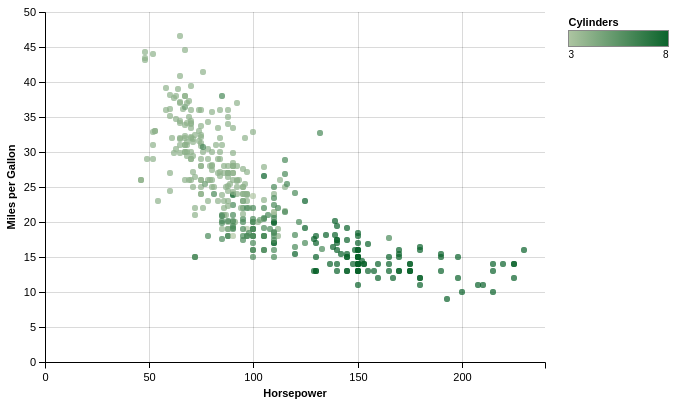

In [8]:
car_Chart = Chart(car_data).mark_circle().encode(
X('Horsepower',axis = Axis(title = 'Horsepower')),
    Y('Miles_per_Gallon', axis = Axis(title ='Miles per Gallon')),
    Color('Cylinders')
)
car_Chart

  We generally know that cars with more horsepower gives less mileage. Does increasing the number of cylinders in the engine impact the mileage per gallon? See for yourself! Fancy right? :) Can we do better? 

In [9]:
car_Chart.to_dict(data=False)

{'encoding': {'color': {'field': u'Cylinders', 'type': 'quantitative'},
  'x': {'axis': {'title': u'Horsepower'},
   'field': u'Horsepower',
   'type': 'quantitative'},
  'y': {'axis': {'title': u'Miles per Gallon'},
   'field': u'Miles_per_Gallon',
   'type': 'quantitative'}},
 'mark': 'circle'}

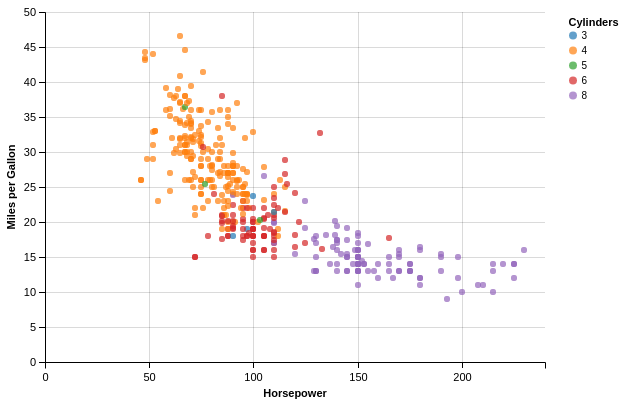

In [10]:
'''We see that Cylinders are of quantitative type. 
   But from our prior knowledge we know that the cylinders in a car don't 
   max out over a range and they can be considered as categorical data types. 
   Lets try overriding Altair's data type interpretation.'''

car_Chart = Chart(car_data).mark_circle().encode(
X('Horsepower',axis = Axis(title = 'Horsepower')),
    Y('Miles_per_Gallon', axis = Axis(title ='Miles per Gallon')),
    Color('Cylinders:N')
)
car_Chart

  Let me introduce some helper functions before we go over the next example:
  

 
Shorthand | Equivalent long-form
----------|---------------------  
x='name'|	X('name')
x='name:Q'|	X('name', type='quantitative')
x='sum(name)'|	X('name', aggregate='sum')
x='sum(name):Q'|	X('name', aggregate='sum', type='quantitative')
  
##### SortField()
  If the encoding channel (i.e X,Y,Row,Column) has a continuous scale (Numerical) we can sort them directly. The default sorting order is *Ascending*.
  If the encoding channel is ordinal then we can use another encoding channel field to sort as a sort definition object. More about this can be found [here](http://vega.github.io/vega-lite/docs/sort.html)
      

#### Sort

For continuous variable Reverse and ascending order


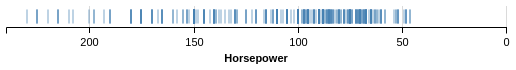

In [11]:
Chart(car_data).mark_tick().encode(
    X('Horsepower',sort='descending'),
)

# try this for ascending
# Chart(car_data).mark_tick().encode(
#     X('Horsepower'),
# )


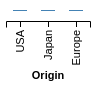

In [12]:
# lets try sorting a categorical variable
Chart(car_data).mark_tick().encode(
    X('Origin',sort='descending'),
)
## You could see that it got sorted by the precedence of alphabet. Now lets try to sort with
## another field or by specifying an operation on same field

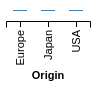

In [13]:
Chart(car_data).mark_tick().encode(
    X('Origin',
      sort=SortField(field='Origin', op='count'),),
)
## Sort based on the number of cars from each origin
## now lets put things together in the next problem

In [14]:
barley_Data = load_dataset('barley')
barley_Data.head()

,site,variety,year,yield
0,University Farm,Manchuria,1931,27.00000
1,Waseca,Manchuria,1931,48.86667
2,Morris,Manchuria,1931,27.43334
3,Crookston,Manchuria,1931,39.93333
4,Grand Rapids,Manchuria,1931,32.96667


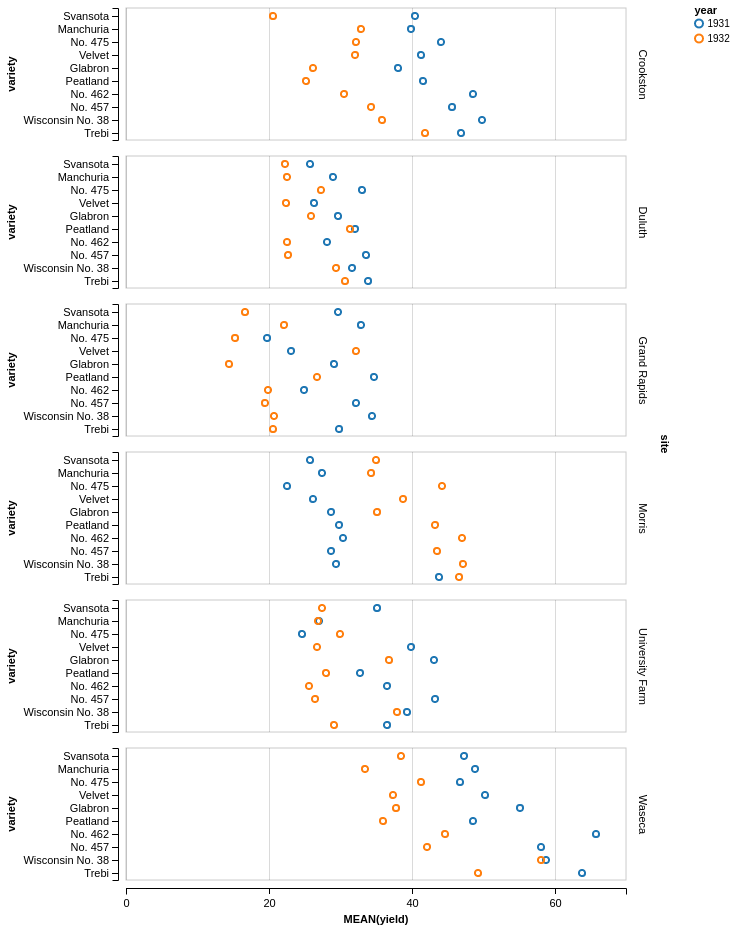

In [15]:
# Let me show you how Row and Column classes in the Encode channels work
# This graph is to understand how response depends on a conditioned exploratory variable.



'''
Questions to answer:Which site has which variety of Barley produce for the corresponding year
'''

Chart(barley_Data).mark_point().encode(
    color='year:N',
    row='site:O',
    x='mean(yield):Q',
    y=Y('variety:O',
        scale=Scale(
            bandSize=12.0,
        ),
        ## variety is an ordinal field. We are using another field as sort definition object here
        sort=SortField(
            field='yield',
            op='mean',
        )
    )
)

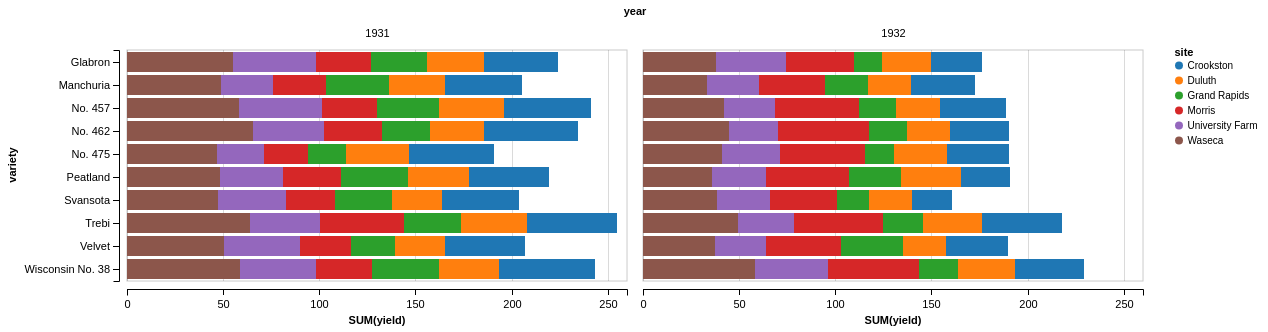

In [16]:
'''
Question to Answer: how much of yield have happened
                  in particular site for a particular variety each year?
''' 
Chart(barley_Data).mark_bar().encode(
    color='site:N',
    column='year:O',
    x='sum(yield):Q', ## According to vega documentation, We cannot change title of field names
    ## derived from transformation functions
    y='variety:N',
)

#### Binning and Aggregation

  This section introduces **data transformation pipeline** which embedded to the visualisation process. Binning is a process of grouping similar data. Aggregation is a process of applying a group function on the specific group. It follows the same concept as [pandas](http://pandas.pydata.org/pandas-docs/stable/groupby.html). Coming back to Cars dataset.

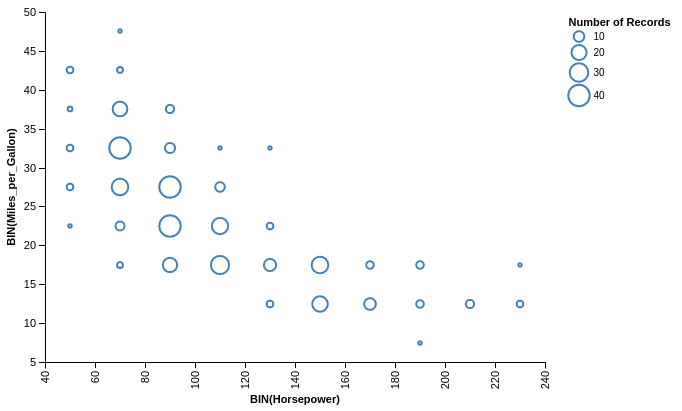

In [17]:
'''
Question to answer: How many cars are there with similar (mileage,horsepower)
'''
from altair  import Size
car_Chart = Chart(car_data).mark_point().encode(
    X('Horsepower', bin=True),
    Y('Miles_per_Gallon', bin=True),
    Size('count(*):Q'),
)
car_Chart

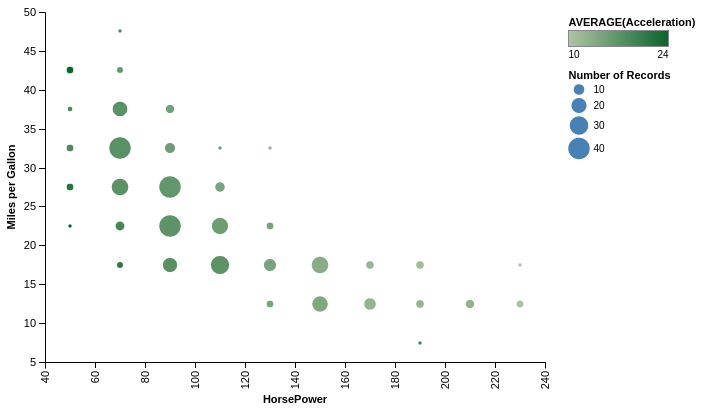

In [18]:
'''
Question to Answer: What is the average acceleration for those vehicles which has similar (mileage,horsepower)?
Does acceleration affect the mileage? Do vehicles with high horsepower accelerates faster? Do they consume
more fuel per mile?
'''

car_Data = Chart(car_data).mark_circle().encode(
   X('Horsepower', bin=True,title='HorsePower'),
    Y('Miles_per_Gallon', bin=True,title='Miles per Gallon'),
    size='count(*):Q',
    color='average(Acceleration):Q'
)

car_Data

#### Data Transformations
  One of the coolest feature in Altair is the transformation feature. Let me brief you the problem it solves.
  
  We will take a US population dataset. I want to display the demographic dividend of last previous census year which is 2000. In Altair viz I can visualize this specific data without pre-processing my dataframe and crunching it to represent 2000 data. 


In [19]:
census_Data = load_dataset('population')
census_Data.head()
# sex 1 = Male and 2= Female

,age,people,sex,year
0,0,1483789,1,1850
1,0,1450376,2,1850
2,5,1411067,1,1850
3,5,1359668,2,1850
4,10,1260099,1,1850


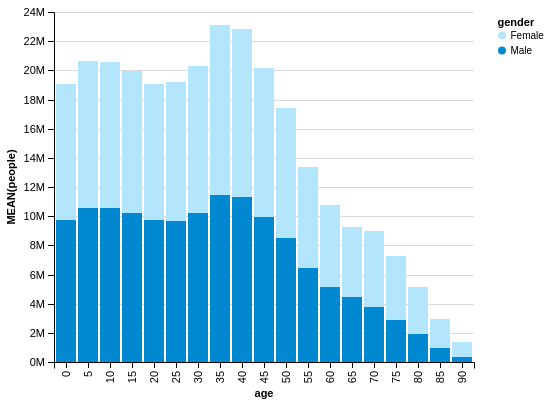

In [20]:
from altair import Formula
color_range = Scale(range=['#B3E5FC','#0288D1'])
male_or_female = Formula(field='gender',
                       expr='datum.sex == 1 ? "Male" : "Female"')
Chart(census_Data).mark_bar().encode(
    x='age:O',
    y='mean(people):Q',
    color=Color('gender:N', scale=color_range)
).transform_data(
    # inside transform_data we can set column names as attributes of datum.
    filter='datum.year == 2000',
    calculate=[male_or_female],
)

## interpret the graph this way. of 18.5 M ppl between age 0 and 5 there are 10 M males
## and around 8.5 Million female
## Find a better representation below

* The **filter** attribute of transform_data() accepts a string of **javascript code**, referring to the data column name as an attribute of **datum**, which you can think of as the **row** within the dataset. 
* The calculate`s attribute accepts a **list of Formula objects**, which each define a **new column** using an valid javascript expression over existing columns. In our case **gender** is a new column.

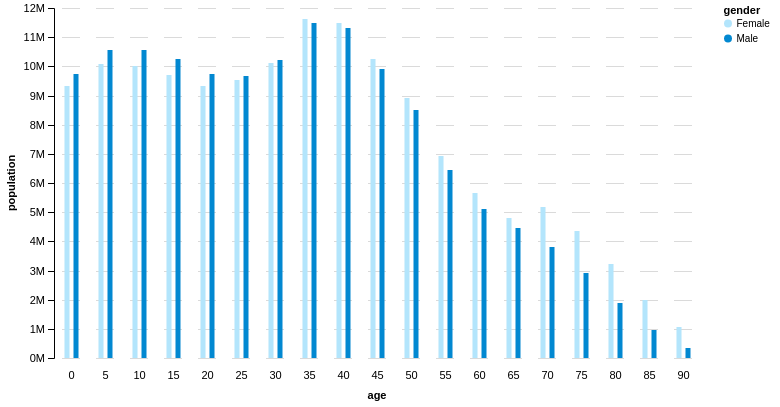

In [21]:
male_or_female = Formula(field='gender',
                       expr='datum.sex == 1 ? "Male" : "Female"')

Chart(census_Data).mark_bar().encode(
    color=Color('gender:N',
        scale=Scale(
            range=['#B3E5FC', '#0288D1'],
        ),
    ),
    column=Column('age:O',
        axis=Axis(
            # orientation of Axis should be in the bottom
            orient='bottom',
        ),
    ),
    x=X('gender:N',
        axis=False,
        scale=Scale(
            # if you remove the bandSize Chart will enlarge
            bandSize=6.0,
        ),
    ),
    y=Y('sum(people):Q',
        axis=Axis(
            title='population',
        ),
    ),
).transform_data(
    calculate=[male_or_female],
    filter='datum.year == 2000',
).configure_facet_cell(
    strokeWidth=0.0,
)

#### Date and Time units

  Many visualizing libraries are really bad at representing timeseries data. Lets see what Altair has to offer

In [22]:
seattle_data = load_dataset('seattle-weather')
seattle_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012/01/01,0.0,12.8,5.0,4.7,drizzle
1,2012/01/02,10.9,10.6,2.8,4.5,rain
2,2012/01/03,0.8,11.7,7.2,2.3,rain
3,2012/01/04,20.3,12.2,5.6,4.7,rain
4,2012/01/05,1.3,8.9,2.8,6.1,rain


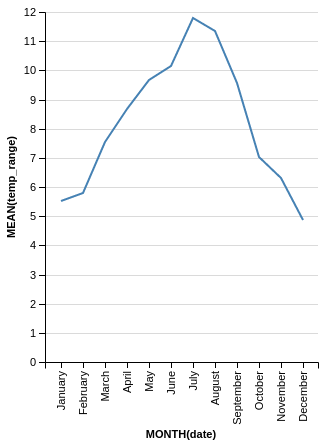

In [23]:
'''
Question to answer: Which months in seattle are warmest? Which are the coldest? over the years
'''

temp_range = Formula(field='temp_range',
                     expr='datum.temp_max - datum.temp_min')


Chart(seattle_data).mark_line().encode(
    X('date:T', timeUnit='month'),
    y='mean(temp_range):Q'
).transform_data(
    calculate=[temp_range],
)

# Conclusion

  So far, you have seen the most basic functionalities of Altair Viz. The developers are still working on the API and I am sure it is only going to get better. 
  
  Altair viz is definitely a constrained visualisation model. I personally like the way it seperates the statistical visualisation problem into understandable components.It will be most suitable to do exploratory data analysis over large datasets. It is also trying to converge usage of single data model which reduces the learning curve for developers. If you are really intereseted to learn more copy paste this code in a new cell and start playing around!

`from altair import tutorial
tutorial()
`
  
## References:

[vega-lite](http://vega.github.io/vega-lite/docs/mark.html)



  